<a href="https://colab.research.google.com/github/kar-elizabeth/iMaterialist_Kaggle_competition/blob/master/SALESFORCE2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 limpieza de datos
SALESFORCE

In [ ]:
# ==============================================
#   1. IMPORTAR LIBRERÍAS NECESARIAS
# ==============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook

# Configuración visual para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ==============================================
#   2. LEER ARCHIVO AAA
# ==============================================
df = pd.read_excel("AAA.xlsx")

# Vista previa de los datos
print("Vista previa de los datos:")
display(df.head())

# ==============================================
#   3. RANKING POR DIVISIÓN
# ==============================================
ranking_division = df['División'].value_counts().reset_index()
ranking_division.columns = ['División', 'Total_Quejas']

# ==============================================
#   4. RANKING POR OFICINA ASIGNADA DENTRO DE CADA DIVISIÓN
# ==============================================
ranking_oficina_division = (
    df.groupby(['División', 'Oficina asignada'])
      .size()
      .reset_index(name='Total_Quejas')
      .sort_values(by=['División', 'Total_Quejas'], ascending=[True, False])
)

# ==============================================
#   5. RANKING GLOBAL POR ÁREA
# ==============================================
ranking_area = df['Área'].value_counts().reset_index()
ranking_area.columns = ['Área', 'Total_Quejas']

# ==============================================
#   6. RANKING GLOBAL POR OFICINA ASIGNADA
# ==============================================
ranking_oficina = df['Oficina asignada'].value_counts().reset_index()
ranking_oficina.columns = ['Oficina asignada', 'Total_Quejas']

# ==============================================
#   7. EXPORTAR TODOS LOS RANKINGS A EXCEL
# ==============================================
excel_filename = "Analisis_Quejas.xlsx"
with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Datos_Originales", index=False)
    ranking_division.to_excel(writer, sheet_name="Ranking_Division", index=False)
    ranking_oficina_division.to_excel(writer, sheet_name="Ranking_Oficina_por_Div", index=False)
    ranking_area.to_excel(writer, sheet_name="Ranking_Area", index=False)
    ranking_oficina.to_excel(writer, sheet_name="Ranking_Oficina_Global", index=False)

print(f"✅ Archivo '{excel_filename}' generado con éxito.")

# ==============================================
#   8. GENERAR GRÁFICOS Y GUARDARLOS EN EXCEL
# ==============================================
# --- Gráfico 1: Ranking por División ---
plt.figure(figsize=(10,5))
sns.barplot(data=ranking_division, x="Total_Quejas", y="División", palette="viridis")
plt.title("Ranking de Quejas por División")
plt.xlabel("Total de Quejas")
plt.ylabel("División")
plt.tight_layout()
plt.savefig("ranking_division.png")
plt.close()

# --- Gráfico 2: Ranking global por Área ---
plt.figure(figsize=(10,5))
sns.barplot(data=ranking_area, x="Total_Quejas", y="Área", palette="mako")
plt.title("Ranking Global de Quejas por Área")
plt.xlabel("Total de Quejas")
plt.ylabel("Área")
plt.tight_layout()
plt.savefig("ranking_area.png")
plt.close()

# --- Gráfico 3: Ranking global por Oficina ---
plt.figure(figsize=(10,5))
sns.barplot(data=ranking_oficina.head(15), x="Total_Quejas", y="Oficina asignada", palette="cubehelix")
plt.title("Top 15 Oficinas con Más Quejas")
plt.xlabel("Total de Quejas")
plt.ylabel("Oficina Asignada")
plt.tight_layout()
plt.savefig("ranking_oficina.png")
plt.close()

# ==============================================
#   9. INSERTAR LOS GRÁFICOS EN EL EXCEL FINAL
# ==============================================
from openpyxl.drawing.image import Image

wb = load_workbook(excel_filename)

# Insertar gráfico 1
ws1 = wb.create_sheet("Grafico_Ranking_Division")
img1 = Image("ranking_division.png")
ws1.add_image(img1, "B2")

# Insertar gráfico 2
ws2 = wb.create_sheet("Grafico_Ranking_Area")
img2 = Image("ranking_area.png")
ws2.add_image(img2, "B2")

# Insertar gráfico 3
ws3 = wb.create_sheet("Grafico_Ranking_Oficina")
img3 = Image("ranking_oficina.png")
ws3.add_image(img3, "B2")

wb.save(excel_filename)
print("📊 Los gráficos fueron agregados al archivo Excel correctamente.")


Vista previa de los datos:


,Número del caso,División,Departamento,Fecha/Hora de apertura,Oficina asignada,Unidad de negocio,Tipo de reporte,Área,Servicio,Puesto,Incidencia,Ruta GFA,Fecha y hora del viaje,Número de autobús,Origen del caso,Descripción
0,367734,Corporativo,NaN,"01/01/2025, 02:04",CORPORATIVO,Primera Plus,Sugerencias,NaN,Asientos,NaN,NaN,GUADALAJARA - LA PIEDAD,"31/12/2024, 18:10",NaN,Encuesta,30 - Caso de encuesta sobre Asientos // Asient...
1,373349,Corporativo,NaN,"22/01/2025, 04:49",CORPORATIVO,Primera Plus,Quejas,Personal,NaN,Conductor,No enciende aire acondicionado,LEON - MEXICO CENTRAL NORTE,"22/01/2025, 01:40",6850,Web,"Vengo en uno de sus autobuses de León a CDMX, ..."
2,378890,Corporativo,NaN,"14/02/2025, 10:04",CORPORATIVO,Primera Plus,Quejas,Personal,NaN,Conductor,Realiza escala no autorizada,QUERETARO - ZIHUATANEJO,"12/02/2025, 23:30",6627,Call Center,Clienta Claudia se comunica para realizar el s...
3,367735,Corporativo,NaN,"01/01/2025, 02:04",CORPORATIVO,Primera Plus,Quejas,Mantenimiento,Audio/ video,NaN,No funciona la Pantalla,GUADALAJARA - LA PIEDAD,"31/12/2024, 18:10",5330,Encuesta,La pantalla no funciona - Caso de encuesta sob...
4,373350,Corporativo,NaN,"22/01/2025, 05:15",CORPORATIVO,Primera Plus,Quejas,Mantenimiento,Internet Abordo,NaN,NaN,ATLACOMULCO - GUADALAJARA,"21/01/2025, 22:00",5419,Encuesta,No aparece - Caso de encuesta sobre Wifi


✅ Archivo 'Analisis_Quejas.xlsx' generado con éxito.


/tmp/ipython-input-3619447504.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_division, x="Total_Quejas", y="División", palette="viridis")
/tmp/ipython-input-3619447504.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_area, x="Total_Quejas", y="Área", palette="mako")
/tmp/ipython-input-3619447504.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_oficina.head(15), x="Total_Quejas", y="Oficina asignada", palette="cubehelix")


📊 Los gráficos fueron agregados al archivo Excel correctamente.


ANALISIS 2 DE ESTUDIO DE OFICINAS

In [ ]:
# ==============================================
#   1. IMPORTAR LIBRERÍAS
# ==============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ==============================================
#   2. LEER ARCHIVO AAA
# ==============================================
df = pd.read_excel("AAA.xlsx")

print("Vista previa de los datos:")
display(df.head())

# ==============================================
#   3. RANKING COMPLETO DE ÁREAS POR OFICINA
# ==============================================
ranking_area_por_oficina = (
    df.groupby(["División", "Oficina asignada", "Área"])
      .size()
      .reset_index(name="Total_Quejas")
      .sort_values(by=["División", "Oficina asignada", "Total_Quejas"], ascending=[True, True, False])
)

# ==============================================
#   4. RANKING GLOBAL DE ÁREAS (SIN AGRUPAR POR OFICINA)
# ==============================================
ranking_area_global = (
    df.groupby(["Área"])
      .size()
      .reset_index(name="Total_Quejas")
      .sort_values(by="Total_Quejas", ascending=False)
)

# ==============================================
#   5. EXPORTAR RESULTADOS A EXCEL
# ==============================================
excel_filename = "Ranking_Areas_por_Oficina.xlsx"
with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Datos_Originales", index=False)
    ranking_area_por_oficina.to_excel(writer, sheet_name="Ranking_Areas_por_Oficina", index=False)
    ranking_area_global.to_excel(writer, sheet_name="Ranking_Areas_Global", index=False)

print(f"✅ Archivo '{excel_filename}' generado con éxito.")

# ==============================================
#   6. GENERAR GRÁFICOS AUTOMÁTICOS
# ==============================================
# --- Gráfico 1: Ranking global de Áreas ---
plt.figure(figsize=(12,6))
sns.barplot(data=ranking_area_global, x="Total_Quejas", y="Área", palette="rocket")
plt.title("Ranking Global de Quejas por Área")
plt.xlabel("Total de Quejas")
plt.ylabel("Área")
plt.tight_layout()
plt.savefig("grafico_ranking_area_global.png")
plt.close()

# --- Gráfico 2: Ranking por Oficina (Top 10 Áreas más problemáticas por Oficina) ---
# Seleccionamos las 10 Oficinas con más quejas para graficar mejor
top_oficinas = (
    ranking_area_por_oficina.groupby("Oficina asignada")["Total_Quejas"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top_oficinas = ranking_area_por_oficina[ranking_area_por_oficina["Oficina asignada"].isin(top_oficinas)]

plt.figure(figsize=(14,7))
sns.barplot(data=df_top_oficinas, x="Total_Quejas", y="Oficina asignada", hue="Área", dodge=True)
plt.title("Top 10 Oficinas y sus Áreas con Más Quejas")
plt.xlabel("Total de Quejas")
plt.ylabel("Oficina Asignada")
plt.legend(title="Área")
plt.tight_layout()
plt.savefig("grafico_ranking_area_oficina.png")
plt.close()

# ==============================================
#   7. INSERTAR GRÁFICOS EN EL EXCEL FINAL
# ==============================================
wb = load_workbook(excel_filename)

# Hoja para ranking global
ws1 = wb.create_sheet("Grafico_Area_Global")
img1 = Image("grafico_ranking_area_global.png")
ws1.add_image(img1, "B2")

# Hoja para ranking por oficina
ws2 = wb.create_sheet("Grafico_Area_Oficina")
img2 = Image("grafico_ranking_area_oficina.png")
ws2.add_image(img2, "B2")

wb.save(excel_filename)
print("📊 Gráficos agregados correctamente al archivo Excel.")


Vista previa de los datos:


,Número del caso,División,Departamento,Fecha/Hora de apertura,Oficina asignada,Unidad de negocio,Tipo de reporte,Área,Servicio,Puesto,Incidencia,Ruta GFA,Fecha y hora del viaje,Número de autobús,Origen del caso,Descripción
0,367734,Corporativo,NaN,"01/01/2025, 02:04",CORPORATIVO,Primera Plus,Sugerencias,NaN,Asientos,NaN,NaN,GUADALAJARA - LA PIEDAD,"31/12/2024, 18:10",NaN,Encuesta,30 - Caso de encuesta sobre Asientos // Asient...
1,373349,Corporativo,NaN,"22/01/2025, 04:49",CORPORATIVO,Primera Plus,Quejas,Personal,NaN,Conductor,No enciende aire acondicionado,LEON - MEXICO CENTRAL NORTE,"22/01/2025, 01:40",6850,Web,"Vengo en uno de sus autobuses de León a CDMX, ..."
2,378890,Corporativo,NaN,"14/02/2025, 10:04",CORPORATIVO,Primera Plus,Quejas,Personal,NaN,Conductor,Realiza escala no autorizada,QUERETARO - ZIHUATANEJO,"12/02/2025, 23:30",6627,Call Center,Clienta Claudia se comunica para realizar el s...
3,367735,Corporativo,NaN,"01/01/2025, 02:04",CORPORATIVO,Primera Plus,Quejas,Mantenimiento,Audio/ video,NaN,No funciona la Pantalla,GUADALAJARA - LA PIEDAD,"31/12/2024, 18:10",5330,Encuesta,La pantalla no funciona - Caso de encuesta sob...
4,373350,Corporativo,NaN,"22/01/2025, 05:15",CORPORATIVO,Primera Plus,Quejas,Mantenimiento,Internet Abordo,NaN,NaN,ATLACOMULCO - GUADALAJARA,"21/01/2025, 22:00",5419,Encuesta,No aparece - Caso de encuesta sobre Wifi


✅ Archivo 'Ranking_Areas_por_Oficina.xlsx' generado con éxito.


/tmp/ipython-input-642758631.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_area_global, x="Total_Quejas", y="Área", palette="rocket")


📊 Gráficos agregados correctamente al archivo Excel.


Vista previa de los datos:


,Número del caso,División,Departamento,Fecha/Hora de apertura,Oficina asignada,Unidad de negocio,Tipo de reporte,Área,Servicio,Puesto,Incidencia,Ruta GFA,Fecha y hora del viaje,Número de autobús,Origen del caso,Descripción
0,367734,Corporativo,NaN,"01/01/2025, 02:04",CORPORATIVO,Primera Plus,Sugerencias,NaN,Asientos,NaN,NaN,GUADALAJARA - LA PIEDAD,"31/12/2024, 18:10",NaN,Encuesta,30 - Caso de encuesta sobre Asientos // Asient...
1,373349,Corporativo,NaN,"22/01/2025, 04:49",CORPORATIVO,Primera Plus,Quejas,Personal,NaN,Conductor,No enciende aire acondicionado,LEON - MEXICO CENTRAL NORTE,"22/01/2025, 01:40",6850,Web,"Vengo en uno de sus autobuses de León a CDMX, ..."
2,378890,Corporativo,NaN,"14/02/2025, 10:04",CORPORATIVO,Primera Plus,Quejas,Personal,NaN,Conductor,Realiza escala no autorizada,QUERETARO - ZIHUATANEJO,"12/02/2025, 23:30",6627,Call Center,Clienta Claudia se comunica para realizar el s...
3,367735,Corporativo,NaN,"01/01/2025, 02:04",CORPORATIVO,Primera Plus,Quejas,Mantenimiento,Audio/ video,NaN,No funciona la Pantalla,GUADALAJARA - LA PIEDAD,"31/12/2024, 18:10",5330,Encuesta,La pantalla no funciona - Caso de encuesta sob...
4,373350,Corporativo,NaN,"22/01/2025, 05:15",CORPORATIVO,Primera Plus,Quejas,Mantenimiento,Internet Abordo,NaN,NaN,ATLACOMULCO - GUADALAJARA,"21/01/2025, 22:00",5419,Encuesta,No aparece - Caso de encuesta sobre Wifi


✅ Archivo 'Analisis_Completo_Quejas.xlsx' creado con los rankings y datos.


/tmp/ipython-input-3975186789.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Quejas", y="Área", data=ranking_area_global, palette="rocket")


ValueError: Unknown format code 'd' for object of type 'float'

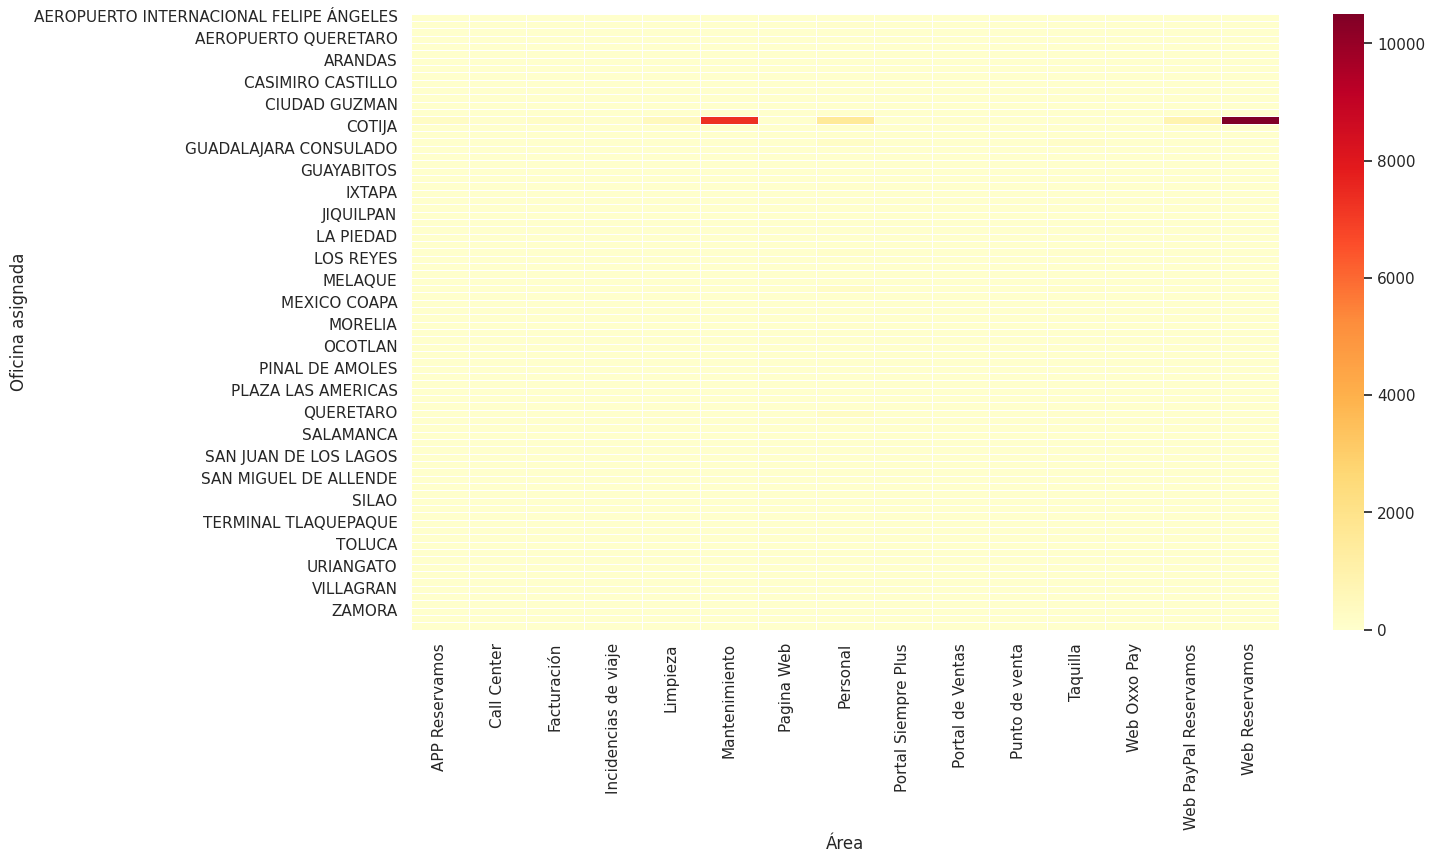

In [ ]:
# ==============================================
# 1. IMPORTAR LIBRERÍAS
# ==============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# ==============================================
# 2. LEER ARCHIVO AAA
# ==============================================
df = pd.read_excel("AAA.xlsx")
print("Vista previa de los datos:")
display(df.head())

# ==============================================
# 3. RANKINGS COMPLETOS
# ==============================================
# Ranking por División
ranking_division = df['División'].value_counts().reset_index()
ranking_division.columns = ['División', 'Total_Quejas']

# Ranking global por Área
ranking_area_global = df['Área'].value_counts().reset_index()
ranking_area_global.columns = ['Área', 'Total_Quejas']

# Ranking de Áreas por Oficina asignada
ranking_area_por_oficina = (
    df.groupby(["División", "Oficina asignada", "Área"])
      .size()
      .reset_index(name="Total_Quejas")
      .sort_values(["División", "Oficina asignada", "Total_Quejas"], ascending=[True, True, False])
)

# ==============================================
# 4. PARETO DE ÁREAS
# ==============================================
ranking_area_global['Porcentaje'] = ranking_area_global['Total_Quejas']/ranking_area_global['Total_Quejas'].sum()*100
ranking_area_global['Porcentaje_Acumulado'] = ranking_area_global['Porcentaje'].cumsum()

# ==============================================
# 5. KPIs AUTOMÁTICOS
# ==============================================
total_quejas = len(df)
top3_division = ranking_division.head(3)
top3_oficina = df['Oficina asignada'].value_counts().head(3)
top3_area = ranking_area_global.head(3)

# ==============================================
# 6. EXPORTAR TODO A EXCEL
# ==============================================
excel_filename = "Analisis_Completo_Quejas.xlsx"
with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
    # Datos originales
    df.to_excel(writer, sheet_name="Datos_Originales", index=False)
    # Rankings
    ranking_division.to_excel(writer, sheet_name="Ranking_Division", index=False)
    ranking_area_global.to_excel(writer, sheet_name="Ranking_Area_Global", index=False)
    ranking_area_por_oficina.to_excel(writer, sheet_name="Ranking_Areas_por_Oficina", index=False)
    # Pareto
    ranking_area_global.to_excel(writer, sheet_name="Pareto_Areas", index=False)

print(f"✅ Archivo '{excel_filename}' creado con los rankings y datos.")

# ==============================================
# 7. GRÁFICOS AUTOMÁTICOS
# ==============================================
# Gráfico 1: Pareto de Áreas
plt.figure(figsize=(12,6))
sns.barplot(x="Total_Quejas", y="Área", data=ranking_area_global, palette="rocket")
plt.title("Pareto de Áreas con Más Quejas")
plt.tight_layout()
plt.savefig("grafico_pareto_areas.png")
plt.close()

# Gráfico 2: Heatmap por División/Oficina/Área
heatmap_data = ranking_area_por_oficina.pivot_table(index="Oficina asignada", columns="Área", values="Total_Quejas", fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5, annot=True, fmt="d")
plt.title("Heatmap de Quejas por Oficina y Área")
plt.tight_layout()
plt.savefig("heatmap_areas_oficina.png")
plt.close()

# ==============================================
# 8. INSERTAR GRÁFICOS EN EL EXCEL
# ==============================================
wb = load_workbook(excel_filename)

# Gráfico Pareto
ws1 = wb.create_sheet("Grafico_Pareto_Areas")
img1 = Image("grafico_pareto_areas.png")
ws1.add_image(img1, "B2")

# Heatmap
ws2 = wb.create_sheet("Heatmap_Areas_Oficina")
img2 = Image("heatmap_areas_oficina.png")
ws2.add_image(img2, "B2")

# ==============================================
# 9. HOJA DE KPIs
# ==============================================
ws_kpi = wb.create_sheet("KPIs")
ws_kpi.append(["Indicador", "Valor"])
ws_kpi.append(["Total Quejas", total_quejas])

# Top 3 Divisiones
for i, row in top3_division.iterrows():
    ws_kpi.append([f"Top División: {row['División']}", row['Total_Quejas']])

# Top 3 Oficinas
for oficina, count in top3_oficina.items():
    ws_kpi.append([f"Top Oficina: {oficina}", count])

# Top 3 Áreas
for i, row in top3_area.iterrows():
    ws_kpi.append([f"Top Área: {row['Área']}", row['Total_Quejas']])

wb.save(excel_filename)
print("📊 Dashboard completo con gráficos y KPIs agregado al Excel correctamente.")


In [ ]:
# ==============================================
# 7. GRÁFICOS AUTOMÁTICOS CORREGIDOS
# ==============================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# --- Gráfico 1: Pareto de Áreas ---
plt.figure(figsize=(12,6))
# Usamos color en lugar de palette para evitar FutureWarning
sns.barplot(x="Total_Quejas", y="Área", data=ranking_area_global, color="tomato")
plt.title("Pareto de Áreas con Más Quejas")
plt.xlabel("Total de Quejas")
plt.ylabel("Área")
plt.tight_layout()
plt.savefig("grafico_pareto_areas.png")
plt.close()

# --- Gráfico 2: Heatmap por División/Oficina/Área ---
# Convertimos los valores a enteros para evitar error con fmt="d"
heatmap_data = ranking_area_por_oficina.pivot_table(
    index="Oficina asignada",
    columns="Área",
    values="Total_Quejas",
    fill_value=0
).astype(int)

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5, annot=True, fmt="d")
plt.title("Heatmap de Quejas por Oficina y Área")
plt.xlabel("Área")
plt.ylabel("Oficina Asignada")
plt.tight_layout()
plt.savefig("heatmap_areas_oficina.png")
plt.close()

print("✅ Gráficos corregidos generados y guardados como PNG.")


✅ Gráficos corregidos generados y guardados como PNG.


In [ ]:
import pandas as pd
import re

# Carga tu archivo Excel
df = pd.read_excel("AAA CORPORATIVO.xlsx")

# Función para limpiar textos
def limpiar_texto(texto):
    if pd.isna(texto):  # Si la celda está vacía, regresa NaN
        return texto
    # Quita NBSP (\u00A0), espacios invisibles (\u200B-\u200D), caracteres raros y dobles espacios
    texto = str(texto)
    texto = re.sub(r'[\u00A0\u200B\u200C\u200D]', ' ', texto)  # reemplaza por espacios normales
    texto = texto.replace("\t", " ")  # elimina tabuladores
    texto = texto.replace("\n", " ")  # elimina saltos de línea
    texto = texto.strip()             # quita espacios al inicio y final
    texto = re.sub(r'\s+', ' ', texto)  # colapsa múltiples espacios internos
    return texto.upper()  # convierte a mayúsculas

# Aplica la limpieza a TODAS las columnas de texto
df = df.applymap(limpiar_texto)

# Exporta el archivo limpio para Excel
df.to_excel("ciudades_limpias.xlsx", index=False)
print("✅ Archivo limpio generado: ciudades_limpias.xlsx")
